<a href="https://colab.research.google.com/github/shiuli-19/22BCE0342-BCSE206L-Project/blob/main/notebooks/BCSE206L_Review2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("GSS7402.csv")

In [3]:
print("Missing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)

Missing Values:
 rownames            0
kids                0
age                 0
education           0
year                0
siblings            0
agefirstbirth    5808
ethnicity           0
city16              0
lowincome16         0
immigrant           0
dtype: int64

Data Types:
 rownames           int64
kids               int64
age                int64
education          int64
year               int64
siblings           int64
agefirstbirth    float64
ethnicity         object
city16            object
lowincome16       object
immigrant         object
dtype: object


In [4]:
# Fill missing values in 'agefirstbirth' with 0
df['agefirstbirth'] = df['agefirstbirth'].fillna(0)

In [5]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 rownames         0
kids             0
age              0
education        0
year             0
siblings         0
agefirstbirth    0
ethnicity        0
city16           0
lowincome16      0
immigrant        0
dtype: int64


In [6]:
# Convert categorical columns to numeric using LabelEncoder
label_encoder = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_encoder.fit_transform(df[col])


In [7]:
print("\nData Types:\n", df.dtypes)


Data Types:
 rownames           int64
kids               int64
age                int64
education          int64
year               int64
siblings           int64
agefirstbirth    float64
ethnicity          int64
city16             int64
lowincome16        int64
immigrant          int64
dtype: object


In [8]:
df.head()

,rownames,kids,age,education,year,siblings,agefirstbirth,ethnicity,city16,lowincome16,immigrant
0,1,0,25,14,2002,1,0.0,0,0,0,0
1,2,1,30,13,2002,4,19.0,0,1,0,0
2,3,1,55,2,2002,1,27.0,0,0,0,1
3,4,2,57,16,2002,1,22.0,0,0,0,0
4,5,2,71,12,2002,6,29.0,0,1,0,0


In [9]:
# Save the cleaned dataset to a new CSV
df.to_csv("GSS7402_cleaned.csv", index=False)

In [12]:
!pip install pandasql


  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=dc6fbba002efefebb7d819246312269f8bfb79d58b6ff6f13a356e1ab51acac7
  Stored in directory: /root/.cache/pip/wheels/15/a1/e7/6f92f295b5272ae5c02365e6b8fa19cb93f16a537090a1cf27
Successfully built pandasql


In [13]:
import sqlite3
from pandasql import sqldf

In [14]:
# Step 3: Load into SQLite database

connection = sqlite3.connect('mydb2.db')
df.to_sql('gss', connection, if_exists='replace', index=False)
print("Data successfully loaded into SQLite database 'mydb2.db' (table: gss)")


Data successfully loaded into SQLite database 'mydb2.db' (table: gss)


In [16]:
# Query 1: Average number of kids by ethnicity
query1 = """
SELECT ethnicity, AVG(kids) AS avg_kids
FROM df
GROUP BY ethnicity
ORDER BY avg_kids DESC
"""
result1 = sqldf(query1)
print("\n Query 1: Average kids by ethnicity\n", result1)


 Query 1: Average kids by ethnicity
    ethnicity  avg_kids
0          1  2.323249
1          0  2.015951


In [19]:
# Query 2: Count of childless people by lowincome16 and immigrant status (objective 1)
query2 = """
SELECT lowincome16, immigrant, COUNT(*) AS count_childless
FROM df
WHERE kids = 0
GROUP BY lowincome16, immigrant
"""
result2 = sqldf(query2)
print("\n Query 2: Count of childless individuals by income & immigrant status\n", result2)


 Query 2: Count of childless individuals by income & immigrant status
    lowincome16  immigrant  count_childless
0            0          0             1564
1            0          1              197
2            1          0              326
3            1          1               40


In [21]:
# Query 3: Fertility trends by year (with row numbering)
query3 = """
SELECT year, AVG(kids) AS avg_kids,
ROW_NUMBER() OVER (ORDER BY year) AS row_num
FROM df
GROUP BY year
"""
result3 = sqldf(query3)
print("\n Query 3: Fertility trends over years\n", result3)


 Query 3: Fertility trends over years
    year  avg_kids  row_num
0  1974  2.563057        1
1  1978  2.104903        2
2  1982  2.204887        3
3  1986  2.163895        4
4  1990  1.984355        5
5  1994  1.980450        6
6  1998  1.962658        7
7  2002  1.939354        8


In [23]:
# Query 4: Average age at first birth by education level
query4 = """
SELECT education, AVG(agefirstbirth) AS avg_age_first_birth
FROM df
WHERE agefirstbirth > 0
GROUP BY education
ORDER BY avg_age_first_birth
"""
result4 = sqldf(query4)
print("\n Query 4: Average age at first birth by education level\n", result4)



 Query 4: Average age at first birth by education level
     education  avg_age_first_birth
0           1            13.000000
1           0            16.500000
2           3            19.250000
3          10            19.388889
4           4            19.583333
5           9            19.598039
6           5            19.611111
7          11            19.959064
8           8            20.726415
9           6            21.500000
10         12            21.976253
11          7            22.043478
12         13            22.093484
13         14            22.932990
14          2            23.000000
15         15            24.194969
16         16            25.367688
17         17            25.869048
18         19            26.000000
19         20            27.230769
20         18            27.363636


In [25]:
# Query 5: Top 5 youngest average age of first birth by ethnicity
query5 = """
SELECT ethnicity, AVG(agefirstbirth) AS avg_age_first_birth
FROM df
WHERE agefirstbirth > 0
GROUP BY ethnicity
ORDER BY avg_age_first_birth ASC
LIMIT 5
"""
result5 = sqldf(query5)
print("\n Query 5: Top 5 youngest average age of first birth by ethnicity\n", result5)



 Query 5: Top 5 youngest average age of first birth by ethnicity
    ethnicity  avg_age_first_birth
0          1            20.827725
1          0            23.152199


# **Clustering**

In [27]:
!pip install kmodes


In [28]:
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv("GSS7402_cleaned.csv")

if 'rownames' in df.columns:
    df = df.drop(columns=['rownames'])

print("'rownames' present?", 'rownames' in df.columns)


'rownames' present? False


In [32]:
#Step 3: Identify categorical and numerical columns

cat_cols = ['ethnicity', 'city16', 'lowincome16', 'immigrant']
num_cols = [col for col in df.columns if col not in cat_cols]

In [33]:
# Step 4: Scale only numerical data

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [37]:
# Convert all data to numpy array for KPrototypes
data_matrix = df.to_numpy()


In [38]:
# Step 6: Run K-Prototypes clustering

kproto = KPrototypes(n_clusters=3, init='Cao', random_state=42)
clusters = kproto.fit_predict(data_matrix, categorical=[df.columns.get_loc(col) for col in cat_cols])


In [39]:
df['cluster'] = clusters

In [41]:
cluster_summary = df.groupby('cluster').mean(numeric_only=True)
print("\n Cluster Summary (Numerical Feature Means):\n", cluster_summary)

# For categorical cluster modes:
print("\n Cluster Modes (Categorical Features):")
for i in range(3):
    modes = df[df['cluster'] == i][cat_cols].mode().iloc[0]
    print(f"\nCluster {i}:")
    print(modes)


 Cluster Summary (Numerical Feature Means):
              kids       age  education      year  siblings  agefirstbirth  \
cluster                                                                     
0       -0.674934 -0.564781   0.414273 -0.258034 -0.362346      -0.725908   
1        0.212230  0.131335   0.160582  0.880472 -0.071919       1.293987   
2        0.682307  0.630968  -0.796166 -0.776263  0.607449      -0.648916   

         ethnicity    city16  lowincome16  immigrant  
cluster                                               
0         0.163412  0.524698     0.197013   0.097071  
1         0.214824  0.439698     0.097990   0.115264  
2         0.216789  0.263651     0.383048   0.119397  

 Cluster Modes (Categorical Features):

Cluster 0:
ethnicity      0
city16         1
lowincome16    0
immigrant      0
Name: 0, dtype: int64

Cluster 1:
ethnicity      0
city16         0
lowincome16    0
immigrant      0
Name: 0, dtype: int64

Cluster 2:
ethnicity      0
city16         0
low

##  Cluster Analysis Summary (K-Prototypes Results)

### 1️⃣ Numerical Feature Means
These are **standardized (scaled)** mean values for each cluster — not raw numbers, because the data was scaled using `StandardScaler`.

| Meaning | Interpretation |
|:---------|:----------------|
| `0` | Average across all data |
| Positive value | Above average |
| Negative value | Below average |

| Feature | Description |
|:---------|:-------------|
| `kids` | Number of children |
| `age` | Respondent’s age |
| `education` | Years of education |
| `siblings` | Number of siblings |
| `agefirstbirth` | Age when first child was born |

---

### 2️⃣ Interpreting Each Cluster

#### 🟢 **Cluster 0**
| Feature | Interpretation |
|:---------|:----------------|
| `kids = -0.67` | Fewer kids than average |
| `age = -0.56` | Younger respondents |
| `education = +0.41` | Slightly higher education |
| `agefirstbirth = -0.72` | Had first child earlier |
| `city16 = 1 (mode)` | Mostly from cities at age 16 |
| `lowincome16 = 0` | Not from low-income families |

**👉 Summary:**  
Young, somewhat educated urban respondents who had children early and have fewer kids overall.

---

#### 🔵 **Cluster 1**
| Feature | Interpretation |
|:---------|:----------------|
| `kids = +0.21` | Slightly more kids |
| `age = +0.13` | Middle-aged |
| `education = +0.16` | Average education |
| `agefirstbirth = +1.29` | Much later age at first birth |
| `city16 = 0` | Mostly non-city background |
| `lowincome16 = 0` | Not low-income |

**👉 Summary:**  
Moderately older adults with average education who delayed childbirth — probably career-focused or educated professionals.

---

#### 🟣 **Cluster 2**
| Feature | Interpretation |
|:---------|:----------------|
| `kids = +0.68` | Many children |
| `age = +0.63` | Older respondents |
| `education = -0.80` | Lower education |
| `siblings = +0.60` | Larger families (more siblings) |
| `agefirstbirth = -0.65` | Early childbirth |
| `lowincome16 = +0.38` | Higher share from low-income backgrounds |

**👉 Summary:**  
Older, less educated individuals from larger and poorer families — traditional, early-childbearing demographic.

---

### **Cluster Overview**

| Cluster | Description |
|:---------|:-------------|
| **0** | Young, educated, urban, early parents, fewer kids |
| **1** | Middle-aged, educated, delayed childbirth, moderate family size |
| **2** | Older, low education, early parents, larger families, lower income |


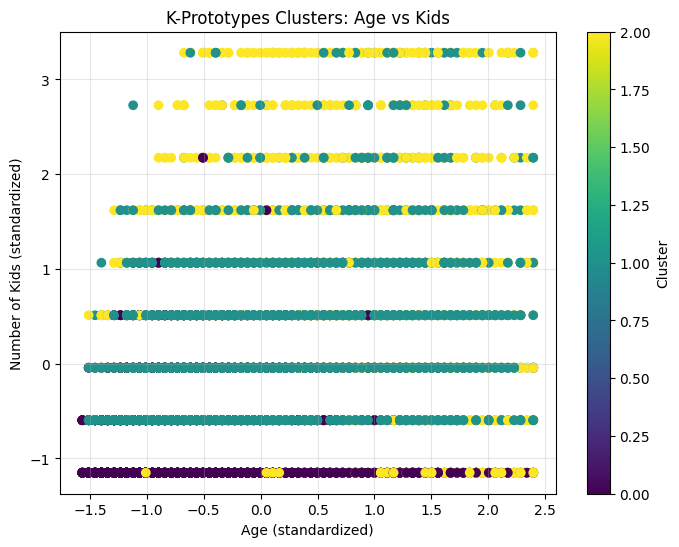

In [43]:
# Step 8: Visualize clusters (optional example: Age vs Kids)
plt.figure(figsize=(8,6))
scatter = plt.scatter(df['age'], df['kids'], c=df['cluster'], cmap='viridis')
plt.xlabel('Age (standardized)')
plt.ylabel('Number of Kids (standardized)')
plt.title('K-Prototypes Clusters: Age vs Kids')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.show()


In [45]:
from sklearn.metrics import classification_report
# --- Choose target columns to evaluate cluster alignment ---
target_cols = ['lowincome16', 'immigrant', 'city16']

for target_col in target_cols:
    if target_col not in df.columns:
        print(f" Column '{target_col}' not found — skipping.")
        continue

    # Create crosstab: how clusters relate to the target variable
    cluster_crosstab = pd.crosstab(df['cluster'], df[target_col])
    print(f"\n Distribution of '{target_col}' within each cluster:")
    print(cluster_crosstab)

    # Determine which category is dominant in each cluster
    cluster_majorities = cluster_crosstab.idxmax(axis=1).to_dict()
    print("\n Majority class per cluster:", cluster_majorities)

    # Predict the majority class for each cluster
    predictions = df['cluster'].map(cluster_majorities)

    # Print classification report to see how well clusters align with the real variable
    print(f"\n Classification Report (Cluster alignment with '{target_col}'):")
    print(classification_report(df[target_col], predictions))
    print("------------------------------------------------------------")


 Distribution of 'lowincome16' within each cluster:
lowincome16     0    1
cluster               
0            2796  686
1            2872  312
2            1514  940

 Majority class per cluster: {0: 0, 1: 0, 2: 0}

 Classification Report (Cluster alignment with 'lowincome16'):
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      7182
           1       0.00      0.00      0.00      1938

    accuracy                           0.79      9120
   macro avg       0.39      0.50      0.44      9120
weighted avg       0.62      0.79      0.69      9120

------------------------------------------------------------

 Distribution of 'immigrant' within each cluster:
immigrant     0    1
cluster             
0          3144  338
1          2817  367
2          2161  293

 Majority class per cluster: {0: 0, 1: 0, 2: 0}

 Classification Report (Cluster alignment with 'immigrant'):
              precision    recall  f1-score   support

         

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

# **Visualization after PCA**


In [46]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [48]:
# Ensure cluster labels exist
if 'cluster' not in df.columns:
    raise ValueError(" Please add your 'cluster' column from K-Prototypes results before running PCA.")


In [49]:
# Step 1: Separate features
num_cols = ['kids', 'age', 'education', 'year', 'siblings', 'agefirstbirth']
cat_cols = ['ethnicity', 'city16', 'lowincome16', 'immigrant']


In [50]:
# Step 2: Encode categorical features numerically (for PCA visualization only)
df_encoded = df.copy()
for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [51]:
# Step 3: Standardize numerical features
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# Step 4: Apply PCA for 2D visualization
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(df_encoded[num_cols + cat_cols])
df_encoded['PCA1'] = pca_result[:, 0]
df_encoded['PCA2'] = pca_result[:, 1]


In [54]:
# Step 5: Compute PCA centroids for each cluster
centroids = df_encoded.groupby('cluster')[['PCA1', 'PCA2']].mean().reset_index()

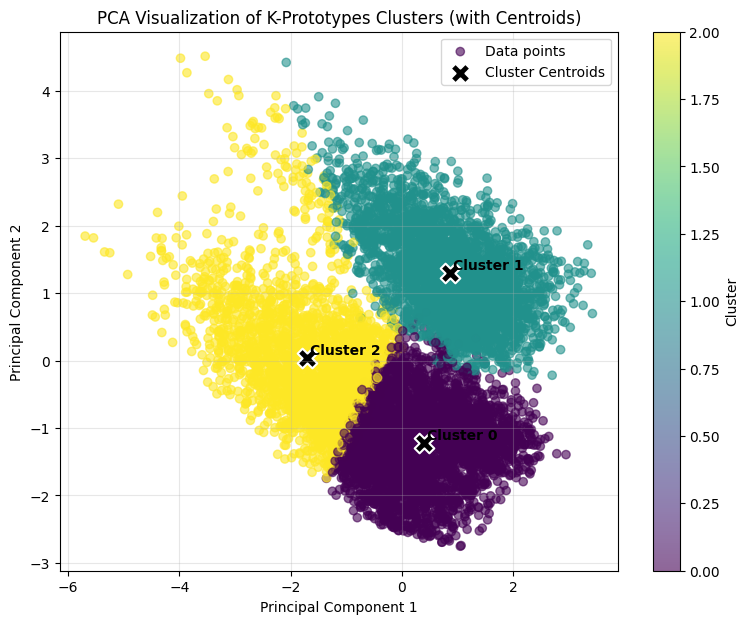

In [56]:
# Step 6: Plot clusters and centroids
plt.figure(figsize=(9, 7))
scatter = plt.scatter(
    df_encoded['PCA1'],
    df_encoded['PCA2'],
    c=df['cluster'],
    cmap='viridis',
    alpha=0.6,
    label='Data points'
)

# Plot centroids as large black markers
plt.scatter(
    centroids['PCA1'],
    centroids['PCA2'],
    c='black',
    s=200,
    marker='X',
    edgecolor='white',
    linewidth=1.5,
    label='Cluster Centroids'
)
# Add cluster labels next to centroids
for i, row in centroids.iterrows():
    plt.text(row['PCA1'] + 0.05, row['PCA2'] + 0.05, f"Cluster {int(row['cluster'])}",
             fontsize=10, weight='bold', color='black')

# Add plot details
plt.colorbar(scatter, label='Cluster')
plt.title('PCA Visualization of K-Prototypes Clusters (with Centroids)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [57]:
print("Explained variance ratio by PCA components:", np.round(pca.explained_variance_ratio_, 3))

Explained variance ratio by PCA components: [0.274 0.252]
